<a href="https://colab.research.google.com/github/gsc16/MachineLearning/blob/master/hw3/hw3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1

I have run the model with learning rate 0.00005 and I could achieve a maximum validation accuracy of 90.70%, after running for 100 epochs. After adding drop out of 0.25, I could achieve a maximum validation accuracy of 91.10% after running for 100 epochs. It reduced the overfitting a bit. But, that is not too significant.

### Downloading data

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-18 02:32:30--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  41.6MB/s    in 1.6s    

2019-04-18 02:32:32 (41.6 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



### Extracting images and splitting data into training and test data sets

In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

### Building the model with VGG19 convolutional base

#### Loading VGG19 convolutional base and freezing it

In [4]:
from keras.applications import VGG19

conv_base = VGG19(
    weights='imagenet', 
    include_top=False, 
    input_shape=(224, 224, 3))

conv_base.trainable = False
for layer in conv_base.layers:
  layer.trainable = False

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
80142336/80134624 [==============================] - 3s 0us/step


#### Adding densely connected layers to the convolutional base

In [5]:
from keras import layers
from keras import models
from keras import optimizers

visualization_layer = conv_base.get_layer('block5_pool').output
temp = layers.Flatten()(visualization_layer)
temp = layers.Dense(256, activation='relu')(temp)
temp = layers.Dense(1, activation='sigmoid')(temp)

model = models.Model(conv_base.input,temp)
model.summary()

for l in conv_base.layers:
  print(l.name),
  print(l.trainable)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

### Training the model

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=0.00001), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=50,
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
100/100 [==============================] - 38s 376ms/step - loss: 0.5533 - acc: 0.7425 - val_loss: 0.4314 - val_acc: 0.8290
Epoch 2/25
100/100 [==============================] - 33s 331ms/step - loss: 0.4199 - acc: 0.8295 - val_loss: 0.3540 - val_acc: 0.8580
Epoch 3/25
100/100 [==============================] - 31s 313ms/step - loss: 0.3628 - acc: 0.8540 - val_loss: 0.3140 - val_acc: 0.8700
Epoch 4/25
100/100 [==============================] - 31s 313ms/step - loss: 0.3314 - acc: 0.8660 - val_loss: 0.2815 - val_acc: 0.8900
Epoch 5/25
100/100 [==============================] - 33s 326ms/step - loss: 0.2987 - acc: 0.8810 - val_loss: 0.2670 - val_acc: 0.8890
Epoch 6/25
100/100 [==============================] - 31s 313ms/step - loss: 0.2876 - acc: 0.8805 - val_loss: 0.2532 - val_acc: 0.8950
Epoch 7/25
100/100 [==============================] - 33s 

### Displaying loss and accuracy during training

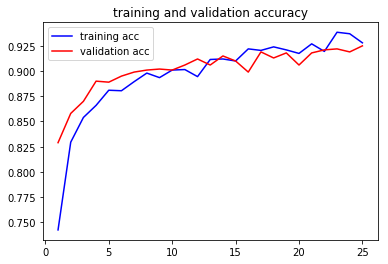

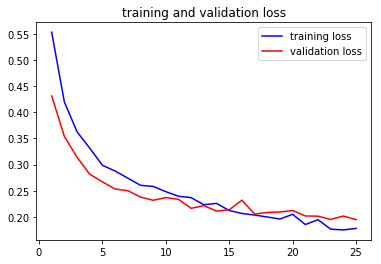

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'b', label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'b', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

## Problem 2

With learning rate of 0.00002 after fine tuning, I could achieve a maximum accuracy fo 95.40%. After adding drop out of 0.25, I could get a maximum validation accuracy of 95.20%, which is almost same as without dropout. But, overfitting reduced a bit, though that is not a significant difference. With learning rate of 0.00001, I could achieve a maximum validation accuracy of 97.10%.

### Fine Tuning

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

### Training model with fine tuning

In [9]:
# compile model

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=0.00001), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/25
100/100 [==============================] - 36s 360ms/step - loss: 0.1780 - acc: 0.9320 - val_loss: 0.1394 - val_acc: 0.9490
Epoch 2/25
100/100 [==============================] - 33s 334ms/step - loss: 0.1452 - acc: 0.9410 - val_loss: 0.1497 - val_acc: 0.9470
Epoch 3/25
100/100 [==============================] - 32s 321ms/step - loss: 0.1059 - acc: 0.9570 - val_loss: 0.1268 - val_acc: 0.9460
Epoch 4/25
100/100 [==============================] - 32s 323ms/step - loss: 0.0910 - acc: 0.9690 - val_loss: 0.1292 - val_acc: 0.9430
Epoch 5/25
100/100 [==============================] - 33s 330ms/step - loss: 0.0669 - acc: 0.9730 - val_loss: 0.1666 - val_acc: 0.9380
Epoch 6/25
100/100 [==============================] - 32s 322ms/step - loss: 0.0600 - acc: 0.9740 - val_loss: 0.1329 - val_acc: 0.9500
Epoch 7/25
100/100 [==============================] - 34s 336ms/step - loss: 0.0543 - acc: 0.9785 - val_loss: 0.1376 - val_acc: 0.9550
Epoch 8/25
100/100 [==============================] - 3

### Displaying training and validation curves with fine tuning

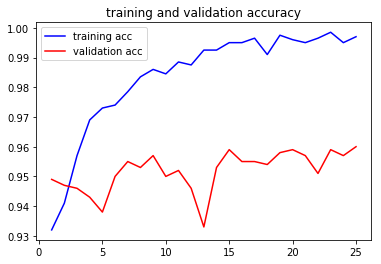

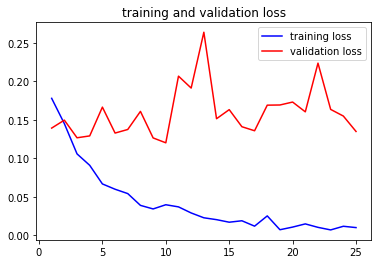

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'b', label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'b', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

### Evaluating on the Validation dataset

In [11]:
val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

Validation loss: 0.17752872889628635
Validation accuracy: 0.958999992609024


### Saving the model

In [0]:
model_fname = 'cats_and_dogs_small_10.h5' 
model.save(model_fname)

## Problem 3

I have used the model that is trained in problem 2 to generate heatmaps for few random dog and cat images.

In [0]:
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input, decode_predictions
from keras import backend as K

In [0]:

def show_superimposed_image(img_path, heatmap):

  img = cv2.imread(img_path)
  # resize the heatmap to be the same size as the original image
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  heatmap = np.uint8(255 * heatmap)

  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  superimposed_img = heatmap * 0.4 + img

  cv2_imshow(superimposed_img)
  
def process_image(img_path, idx=0):
  img = image.load_img(img_path, target_size=(224, 224))

  plt.imshow(img)
  plt.grid(None)
  plt.show()
  
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  preds = model.predict(x)
  
  class_index = np.argsort(preds[0])[-(1+idx)]
  
  class_output = model.output[:, class_index]
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]

  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  plt.matshow(heatmap)
  plt.grid(None)
  plt.show()
  
  show_superimposed_image(img_path, heatmap)

### Displaying heatmaps for cats

In [55]:
!ls /tmp/cats_and_dogs_filtered/validation/cats | head -20

cat.2000.jpg
cat.2001.jpg
cat.2002.jpg
cat.2003.jpg
cat.2004.jpg
cat.2005.jpg
cat.2006.jpg
cat.2007.jpg
cat.2008.jpg
cat.2009.jpg
cat.2010.jpg
cat.2011.jpg
cat.2012.jpg
cat.2013.jpg
cat.2014.jpg
cat.2015.jpg
cat.2016.jpg
cat.2017.jpg
cat.2018.jpg
cat.2019.jpg


In [0]:
last_conv_layer = model.get_layer('block5_conv4')

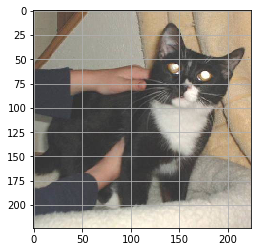

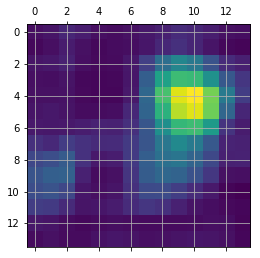

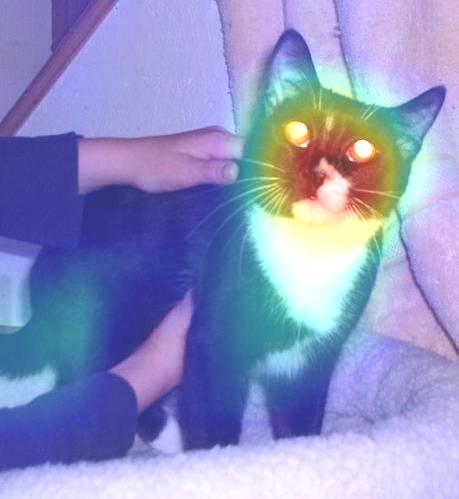

In [57]:
process_image('/tmp/cats_and_dogs_filtered/validation/cats/cat.2000.jpg')

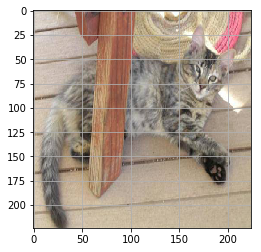

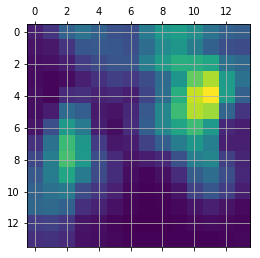

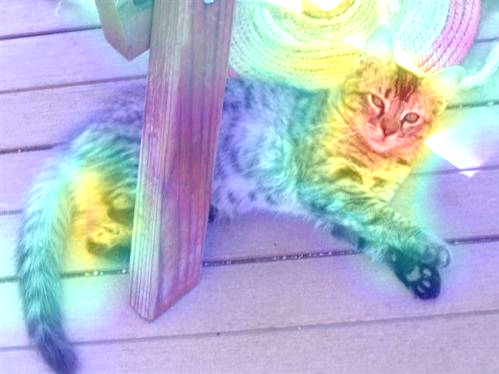

In [58]:
process_image('/tmp/cats_and_dogs_filtered/validation/cats/cat.2010.jpg')

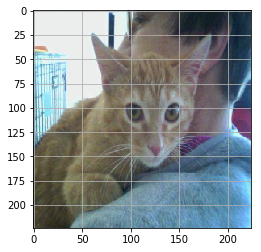

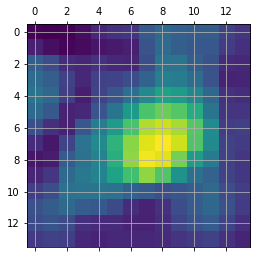

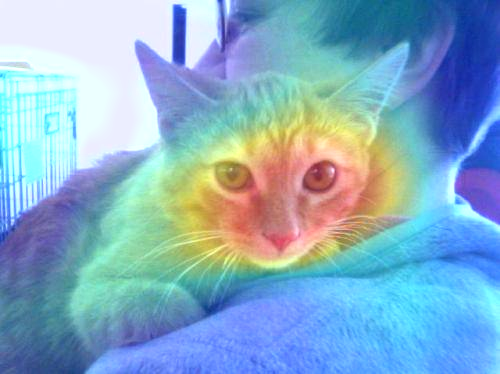

In [59]:
process_image('/tmp/cats_and_dogs_filtered/validation/cats/cat.2019.jpg')

### Displaying heatmaps for dogs

In [60]:
!ls /tmp/cats_and_dogs_filtered/validation/dogs | head -20

dog.2000.jpg
dog.2001.jpg
dog.2002.jpg
dog.2003.jpg
dog.2004.jpg
dog.2005.jpg
dog.2006.jpg
dog.2007.jpg
dog.2008.jpg
dog.2009.jpg
dog.2010.jpg
dog.2011.jpg
dog.2012.jpg
dog.2013.jpg
dog.2014.jpg
dog.2015.jpg
dog.2016.jpg
dog.2017.jpg
dog.2018.jpg
dog.2019.jpg


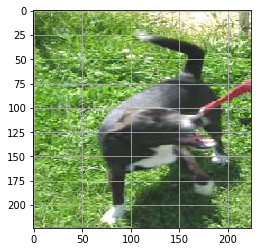

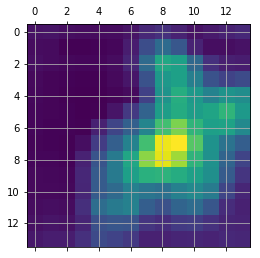

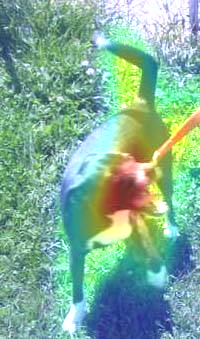

In [61]:
process_image('/tmp/cats_and_dogs_filtered/validation/dogs/dog.2000.jpg')

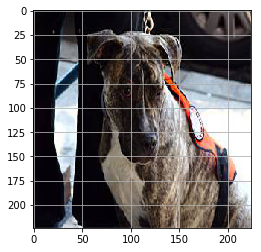

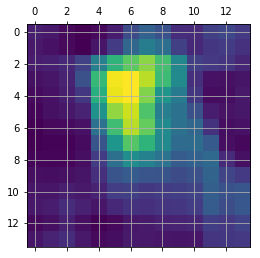

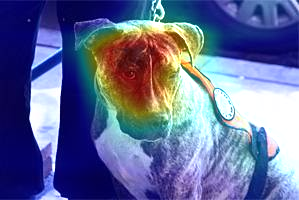

In [62]:
process_image('/tmp/cats_and_dogs_filtered/validation/dogs/dog.2010.jpg')

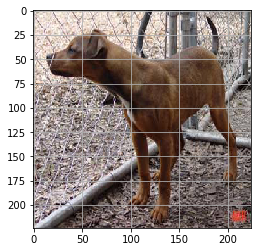

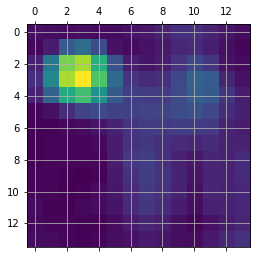

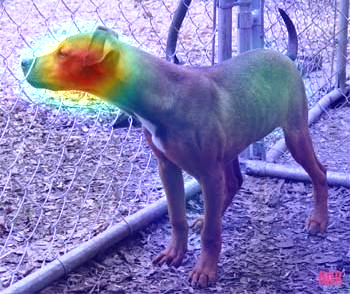

In [63]:
process_image('/tmp/cats_and_dogs_filtered/validation/dogs/dog.2019.jpg')

## Problem 4

### Visualizing activations

####Creating image tensor

In [0]:
from keras.preprocessing import image
import numpy as np

img_path = '/tmp/cats_and_dogs_filtered/validation/cats/cat.2019.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

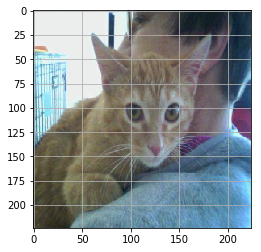

In [65]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.grid(None)
plt.show()

In [66]:
model.predict(img_tensor)

array([[5.7987473e-09]], dtype=float32)

#### Instantiating model with input tensor and list of output tensors

In [67]:
layer_outputs = [layer.output for layer in model.layers[1:25]]
#print(layer_outputs)

activation_model = models.Model(outputs=layer_outputs,input=model.input)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("in...)`
  after removing the cwd from sys.path.


In [68]:
activations = activation_model.predict(img_tensor)
len(activations)

24

In [69]:
first_layer_activation = activations[0]
first_layer_activation.shape

(1, 224, 224, 64)

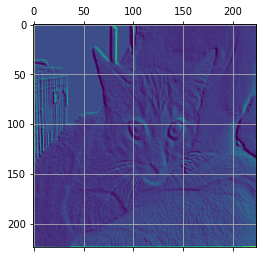

In [70]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.grid(None)
plt.show()

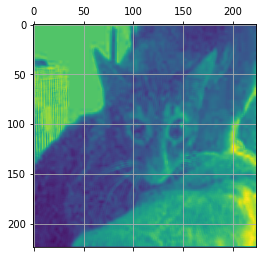

In [71]:
plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')
plt.grid(None)
plt.show()

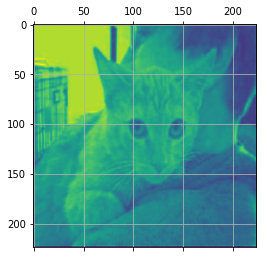

In [72]:
second_layer_activation = activations[1]
plt.matshow(second_layer_activation[0, :, :, 4], cmap='viridis')
plt.grid(None)
plt.show()

#### Visualizing every channel in every intermediate activation

In [0]:
# Definition to visualize intermediate activation
def visualize(layer_index):

  layer_name = model.layers[layer_index].name
  
  images_per_row = 16

  layer_activation = activations[layer_index-1]
  # the feature map has shape (1, size, size, n_features)
  n_features = activations[layer_index-1].shape[-1] 
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))

  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]

      channel_image -= channel_image.mean()
      if(channel_image.std() != 0):
        channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[
          col * size : (col + 1) * size,
          row * size : (row + 1) * size] = channel_image


  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

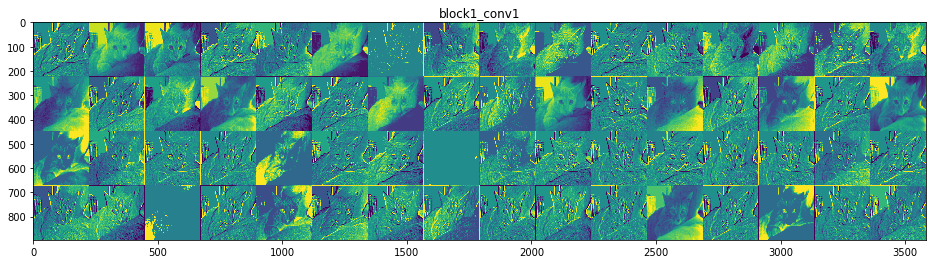

In [74]:
visualize(1)

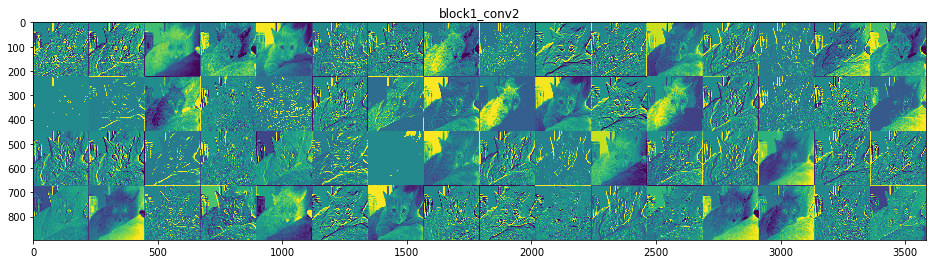

In [75]:
visualize(2)

#### Visualizing last convolutional layer

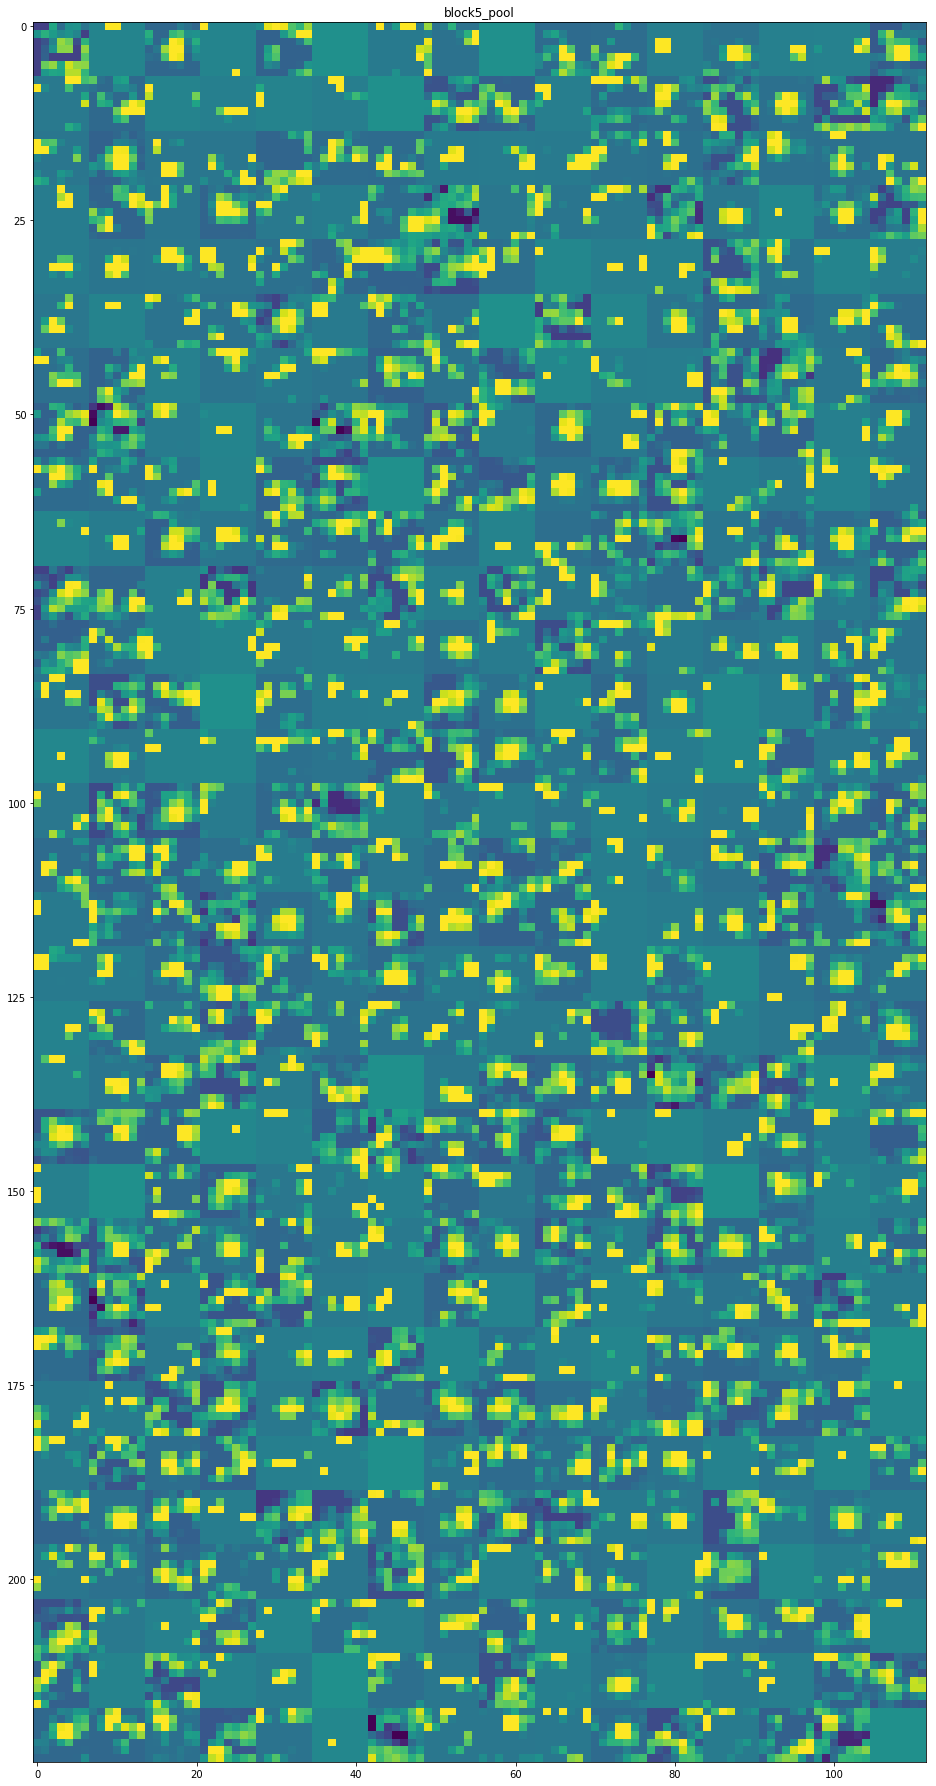

In [76]:
visualize(21)

### Using t-SNE to visualize activations 

In [0]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
import seaborn as sns
from keras import models

#### Loading the model that I have saved for 100 epochs

In [81]:
model = load_model('cats_and_dogs_small_4.h5')
model.summary()

layer = model.get_layer('dense_1')
layer_output = layer.output

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

#### Converting images to tensors

In [0]:
from keras.preprocessing import image

image_tensors = []
original_labels = []

val_cat_fnames = os.listdir(validation_cats_dir)
val_dog_fnames = os.listdir(validation_dogs_dir)
#loading validation images (500 cats, 500 dogs)
next_cat_pix = [os.path.join(validation_cats_dir, fname) 
                for fname in val_cat_fnames[0:]]
next_dog_pix = [os.path.join(validation_dogs_dir, fname) 
                for fname in val_dog_fnames[0:]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
      
  true_label = (img_path)[39:42]
  original_labels.append(true_label)
  
  pred_img = image.load_img(img_path, target_size=(224,224))
  img_tensor = image.img_to_array(pred_img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.
  image_tensors.append(img_tensor)
  

In [0]:
# Creating classes
class_names = ['Cats','Dogs']

#### t-SNE 

In [0]:
# Getting the last layer
layer = model.get_layer('dense_1')
layer_output = layer.output

In [85]:
activation_model = models.Model(input=model.input, outputs=[layer_output])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("in...)`
  """Entry point for launching an IPython kernel.


In [86]:
image_tensors = np.asarray(image_tensors)
image_tensors_array = np.concatenate((image_tensors))
print(image_tensors_array.shape)

#image_tensors = np.asarray(image_tensors)
#image_tensors_array = np.concatenate((image_tensors))

(1000, 224, 224, 3)


In [0]:
activations = activation_model.predict(image_tensors_array)
#activations = activation_model.predict_generator(validation_generator,steps = 50)

In [0]:
# Function to visualize t-SNE
def data_scatter(vecs, labels):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(labels))
    
    palette = np.array(sns.color_palette("husl", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(vecs[:, 0], vecs[:, 1], c=palette[labels])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # legend
    txt_cat = ax.text(-10, -30, class_names[0], fontsize=22, color = 'darkorange')
    txt_cat.set_path_effects([PathEffects.Stroke(linewidth=6, foreground="w"),PathEffects.Normal()])
    txt_dog = ax.text(15, 30, class_names[1], fontsize=22, color = 'skyblue')
    txt_dog.set_path_effects([PathEffects.Stroke(linewidth=6, foreground="w"),PathEffects.Normal()])

In [89]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

tsne = TSNE(random_state=42).fit_transform(activations)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

t-SNE done! Time elapsed: 5.558831453323364 seconds


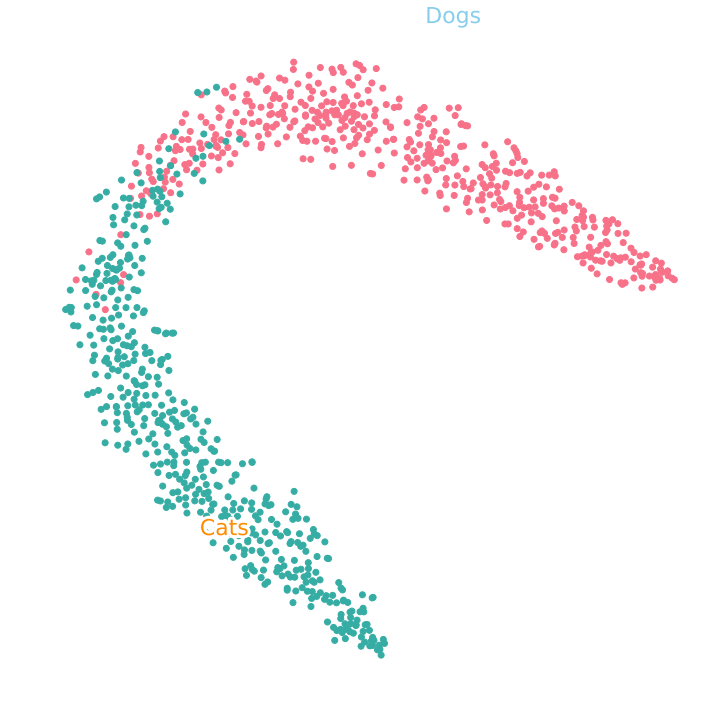

In [90]:
for i in range(len(original_labels)):
  if original_labels[i] == 'cat': 
    original_labels[i] = 0
  if original_labels[i] == 'dog': 
    original_labels[i] = 1

data_scatter(tsne, original_labels)